## Observations and Insights 

In [720]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [721]:
print("Mouse Data:")
mouse_metadata.head()

Mouse Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [722]:
print("Study Results:")
study_results.head()

Study Results:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [723]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print("Combined Data:")
combined_data.head()

Combined Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [724]:
combined_data.shape

(1893, 8)

In [725]:
# Checking the number of mice.
number_mice = len(combined_data["Mouse ID"].unique())
number_mice

249

In [726]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data["key_duplicated"] = combined_data["Mouse ID"] + combined_data["Timepoint"].apply(str)
combined_data = combined_data.set_index("Mouse ID")
combined_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,key_duplicated
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0,k4030
k403,Ramicane,Male,21,16,5,38.825898,0,k4035
k403,Ramicane,Male,21,16,10,35.014271,1,k40310
k403,Ramicane,Male,21,16,15,34.223992,1,k40315
k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2,z96925
z969,Naftisol,Male,9,30,30,65.841013,3,z96930
z969,Naftisol,Male,9,30,35,69.176246,4,z96935


In [727]:
duplicated_id = pd.Series(combined_data.duplicated(subset=["key_duplicated"]))
duplicated_id = duplicated_id[duplicated_id == 1]
duplicated_id

Mouse ID
g989    True
g989    True
g989    True
g989    True
g989    True
dtype: bool

In [728]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = combined_data.loc[combined_data.duplicated(subset=["key_duplicated"])]
print("Duplicated Data")
duplicated_data

Duplicated Data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,key_duplicated
Mouse ID,,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0,g9890
g989,Propriva,Female,21,26,5,47.570392,0,g9895
g989,Propriva,Female,21,26,10,49.880528,0,g98910
g989,Propriva,Female,21,26,15,53.442020,0,g98915
g989,Propriva,Female,21,26,20,54.657650,1,g98920


In [729]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
list_duplicated_id = duplicated_data.index.values.tolist()
list_duplicated_id

reduced_combined_data = combined_data.drop(labels = list_duplicated_id, axis=0)
reduced_combined_data.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,key_duplicated
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0,k4030
k403,Ramicane,Male,21,16,5,38.825898,0,k4035
k403,Ramicane,Male,21,16,10,35.014271,1,k40310
k403,Ramicane,Male,21,16,15,34.223992,1,k40315
k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [730]:
reduced_combined_data.shape

(1880, 8)

In [731]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(reduced_combined_data.index.unique())
number_mice

248

## Summary Statistics

In [732]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
vol_mean = reduced_combined_data["Tumor Volume (mm3)"].mean()
vol_median = reduced_combined_data["Tumor Volume (mm3)"].median()
vol_var = reduced_combined_data["Tumor Volume (mm3)"].var()
vol_std = reduced_combined_data["Tumor Volume (mm3)"].std()
vol_sem = reduced_combined_data["Tumor Volume (mm3)"].sem()

vol_summary_statistics = pd.DataFrame({"Tumor Volume Mean (mm3)": vol_mean, 
                                       "Tumor Volume Median (mm3)": vol_median, 
                                       "Tumor Volume Variance (mm3)": vol_var,
                                       "Tumor Volume STD (mm3)": vol_std,
                                       "Tumor Volume SEM (mm3)": vol_sem}, index = [0])

vol_summary_statistics

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [733]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = reduced_combined_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
regimen_median = reduced_combined_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
regimen_var = reduced_combined_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
regimen_std = reduced_combined_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
regimen_sem = reduced_combined_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()

regimen_mean = regimen_mean.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Mean (mm3)"})
regimen_median = regimen_median.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Median (mm3)"})
regimen_var = regimen_var.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Var (mm3)"})
regimen_std = regimen_std.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume STD (mm3)"})
regimen_sem = regimen_sem.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume SEM (mm3)"})

regimen_summary_statistics = pd.concat([regimen_mean, regimen_median, regimen_var, regimen_std, regimen_sem], axis=1)
regimen_summary_statistics

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Var (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [734]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

regimen_summary_statistics = reduced_combined_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").aggregate(["mean", "median", "var", "std", "sem"])
regimen_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements'}, xlabel='Drug Regimen'>

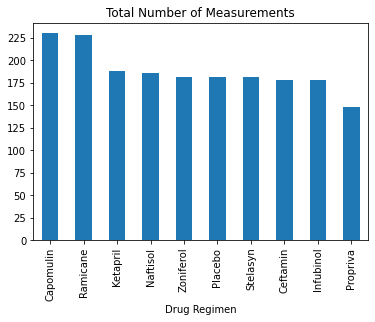

In [735]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_measurements = reduced_combined_data[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen").count().sort_values(by="Timepoint", ascending=False)
number_measurements.plot(kind="bar", title="Total Number of Measurements", legend=False, yticks=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225], width=.5)

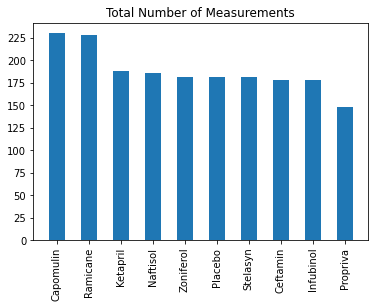

In [736]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
number_measurements_df = pd.DataFrame(number_measurements)
measurements_x = list(number_measurements_df.index)
measurements_y = number_measurements_df["Timepoint"].tolist()
plt.bar(measurements_x, measurements_y, align="center", width=.5)
plt.title("Total Number of Measurements")
plt.xticks(rotation=90)
y = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225]
plt.yticks(y)
plt.show()

array([<AxesSubplot:>], dtype=object)

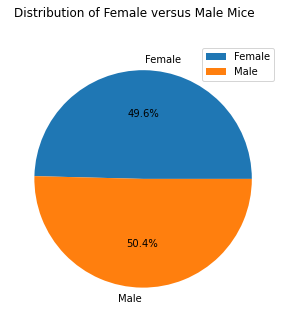

In [737]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice = reduced_combined_data.groupby(reduced_combined_data.index).first()
unique_mice_df = pd.DataFrame(unique_mice)

mice_sex = unique_mice_df[["Sex", "Timepoint"]].groupby("Sex").count() 
mice_sex.plot(kind="pie", title="Distribution of Female versus Male Mice", legend=True, subplots=True, ylabel="", autopct="%1.1f%%", figsize=(10, 5)) 

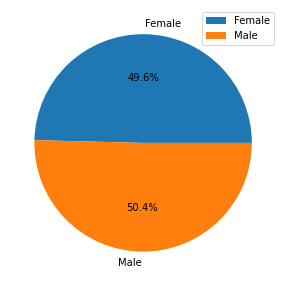

In [738]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mice_sex["Timepoint"].tolist()
labels = list(mice_sex.index)
plt.figure(figsize=(10, 5))
plt.pie(values, labels = labels, autopct="%1.1f%%")
plt.legend(labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [739]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_volume = reduced_combined_data.groupby(reduced_combined_data.index)[["Timepoint"]].max()
final_volume_df = pd.DataFrame(final_volume).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
reduced_combined_data = reduced_combined_data.reset_index()

max_volume_df = pd.merge(final_volume_df, reduced_combined_data, on=["Mouse ID", "Timepoint"], how="left")
max_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,key_duplicated
0,a203,45,Infubinol,Female,20,23,67.973419,2,a20345
1,a251,45,Infubinol,Female,21,25,65.525743,1,a25145
2,a262,45,Placebo,Female,17,29,70.717621,4,a26245
3,a275,45,Ceftamin,Female,20,28,62.999356,3,a27545
4,a366,30,Stelasyn,Female,16,29,63.440686,1,a36630
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,z43510
244,z578,45,Ramicane,Male,11,16,30.638696,0,z57845
245,z581,45,Infubinol,Female,24,25,62.754451,3,z58145
246,z795,45,Naftisol,Female,13,29,65.741070,3,z79545


In [745]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(max_volume_df["Mouse ID"])):
    if max_volume_df.iloc[i, 2] == treatments[0]:
        tumor_vol_capomulin.append(max_volume_df.iloc[i, 6])
    elif max_volume_df.iloc[i, 2] == treatments[1]:
        tumor_vol_ramicane.append(max_volume_df.iloc[i, 6])
    elif max_volume_df.iloc[i, 2] == treatments[2]:
        tumor_vol_infubinol.append(max_volume_df.iloc[i, 6])
    elif max_volume_df.iloc[i, 2] == treatments[3]:
        tumor_vol_ceftamin.append(max_volume_df.iloc[i, 6])  

# add subset 

tumor_vol_capomulin_df = pd.DataFrame(tumor_vol_capomulin, columns=["Tumor Volume (mm3)"])
quartiles = tumor_vol_capomulin_df.quantile([0.25, 0.50, 0.75])
lowerq = quartiles.loc[0.25, "Tumor Volume (mm3)"]
upperq = quartiles.loc[0.75, "Tumor Volume (mm3)"]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
capomulin_outliers = tumor_vol_capomulin_df.loc[(tumor_vol_capomulin_df["Tumor Volume (mm3)"] < lower_bound) |(tumor_vol_capomulin_df["Tumor Volume (mm3)"] > upper_bound)]

tumor_vol_ramicane_df = pd.DataFrame(tumor_vol_ramicane, columns=["Tumor Volume (mm3)"])
quartiles = tumor_vol_ramicane_df.quantile([0.25, 0.50, 0.75])
lowerq = quartiles.loc[0.25, "Tumor Volume (mm3)"]
upperq = quartiles.loc[0.75, "Tumor Volume (mm3)"]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
ramicane_outliers = tumor_vol_ramicane_df.loc[(tumor_vol_ramicane_df["Tumor Volume (mm3)"] < lower_bound) |(tumor_vol_ramicane_df["Tumor Volume (mm3)"] > upper_bound)]

tumor_vol_infubinol_df = pd.DataFrame(tumor_vol_infubinol, columns=["Tumor Volume (mm3)"])
quartiles = tumor_vol_infubinol_df.quantile([0.25, 0.50, 0.75])
lowerq = quartiles.loc[0.25, "Tumor Volume (mm3)"]
upperq = quartiles.loc[0.75, "Tumor Volume (mm3)"]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
infubinol_outliers = tumor_vol_infubinol_df.loc[(tumor_vol_infubinol_df["Tumor Volume (mm3)"] < lower_bound) |(tumor_vol_ramicane_df["Tumor Volume (mm3)"] > upper_bound)]

tumor_vol_ceftamin_df = pd.DataFrame(tumor_vol_ceftamin, columns=["Tumor Volume (mm3)"])
quartiles = tumor_vol_ceftamin_df.quantile([0.25, 0.50, 0.75])
lowerq = quartiles.loc[0.25, "Tumor Volume (mm3)"]
upperq = quartiles.loc[0.75, "Tumor Volume (mm3)"]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
ceftamin_outliers = tumor_vol_ceftamin_df.loc[(tumor_vol_ramicane_df["Tumor Volume (mm3)"] < lower_bound) |(tumor_vol_ceftamin_df["Tumor Volume (mm3)"] > upper_bound)]

# Determine outliers using upper and lower bounds
print("capomulin outliers:")
print(capomulin_outliers)

print("ramicane outliers:")
print(ramicane_outliers)

print("infubinol outliers:")
print(infubinol_outliers)

print("ceftamin outliers:")
print(ceftamin_outliers)

capomulin outliers:
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
ramicane outliers:
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
infubinol outliers:
   Tumor Volume (mm3)
5           36.321346
ceftamin outliers:
    Tumor Volume (mm3)
13           59.741901


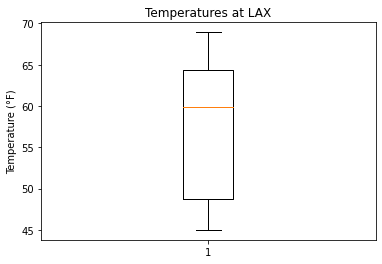

In [748]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(tumor_vol_ceftamin_df["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

In [742]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [743]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [744]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
